Рогович Татьяна, Валентин Бирюков

# Python для анализа данных
## От разведывательного анализа и обработки данных до модели



Загружаем данные. Объединяем train и test, для того, чтобы обрабатывать пропущенные значения и создавать признаки. Но разведывательный анализ будем делать только на тренировочной выборке.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

Несколько заготовок для красивых графико

In [18]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

full = train.append(test, ignore_index = True, sort=False)
titanic = full[:891]

del train, test

print ('Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape)

Посмотрим на дескриптивные статистики тренировочной выборки.

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Aubart, Mme. Leontine Pauline",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


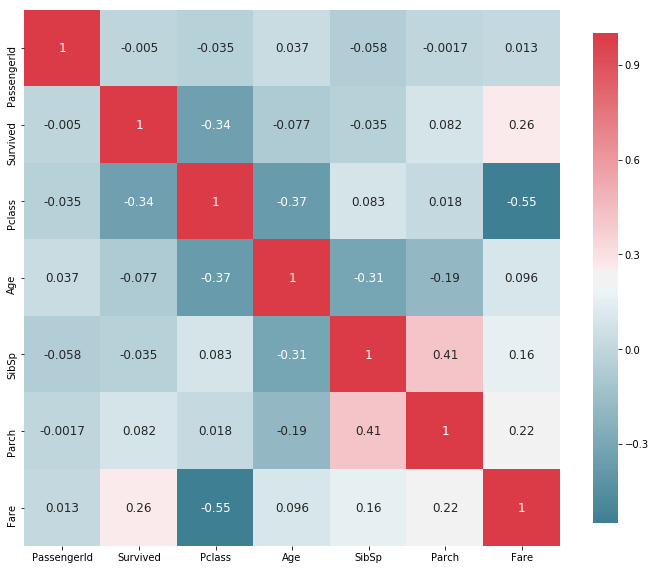

In [19]:
plot_correlation_map(titanic)

Какие выводы можем сделать о мультиколлинеарности и о связи с зависимой переменной?

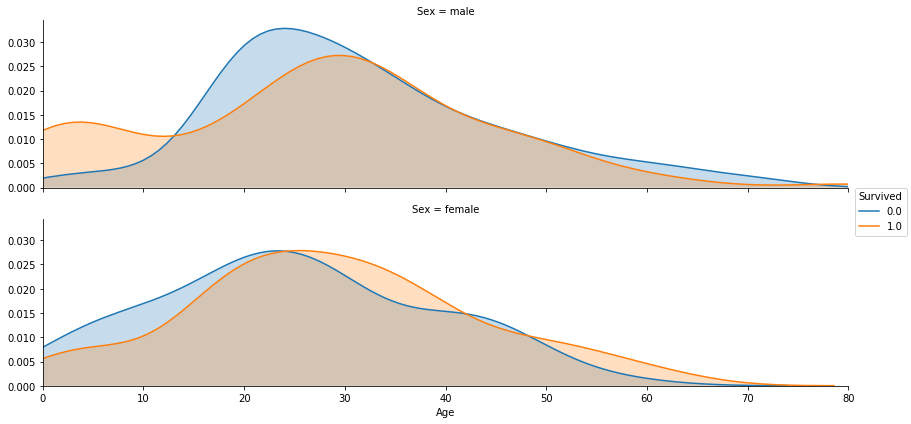

In [21]:
plot_distribution(titanic , var = 'Age' , target = 'Survived' , row = 'Sex')

Как вы думаете, можем ли мы использовать возраст для предсказания, кто выжил, а кто нет? Что нужно сделать с этой переменной, чтобы она была более эффективной в моделях?

# Упражнение 1
Постройте распределение для пассажиров, которые выжили и нет в зависимости от цены и от места посадки. Сделайте вывод, хорошая ли это переменная для предсказания.

In [ ]:
plot_distribution(titanic , var = ??? , target = ???)

In [ ]:
plot_categories(titanic , cat = ??? , target = ??? )

# Упражнение 2 
Давайте построим графики для Sex, Pclass, SibSp и Parch и сделаем выводы.

In [2]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [3]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [4]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [5]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

# Создание новых переменных. 
Создадим переменную титул, посмотрим, как она связана с выживанием + используем ее для заполнения пропусков в возрасте.

In [30]:
full['Title'] = full['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

In [31]:
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Dona              1
Sir               1
Don               1
Jonkheer          1
the Countess      1
Mme               1
Lady              1
Capt              1
Name: Title, dtype: int64

Заменим редкие титулы на категорию Misc

In [32]:
full['Title'] = full['Title'].apply(lambda x: x if x in 
                                    ['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr'] else 'Misc')

In [33]:
full['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Misc       18
Rev         8
Dr          8
Name: Title, dtype: int64

# Работа с пропущенными значениями

Теперь используем титул для заполнения пропущенных значений. Опять работаем на всей выборке.

In [34]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


Обработаем пропущенные значения в переменных Age (по титулу), Fare (средним по классу), Embarked (модой).

In [38]:
full['Age'] = full.Age.fillna(full.groupby('Title')['Age'].transform('median'))

In [39]:
full['Fare'] = full.Fare.fillna(full.groupby('Pclass')['Fare'].transform('median'))

In [51]:
full['Embarked'] = full.Embarked.fillna(full['Embarked'].mode()[0])

In [52]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


# Создание новых переменных: уменьшение категорий

Давайте, во-первых, создадим переменную, которая учитывает полный размер семьи. Потом посмотрим как эта переменная соотносится с выживанием и перекодируем ее в категории.

In [53]:
# introducing a new feature : the size of families (including the passenger)
full['FamilySize'] = full['Parch'] + full['SibSp'] + 1

C:\Users\rogov\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


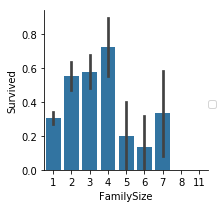

In [55]:
plot_categories(full[:891] , cat = 'FamilySize' , target = 'Survived' )

Мы видим, что в семьях размеров 2-4 процент выживших похож. И нет значительной разницы между семьями больше 5 человек. Давайте используем эту информацию для перекодирования переменных.

In [56]:
# introducing other features based on the family size
full[ 'Family_Single' ] = full[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
full[ 'Family_Small' ]  = full[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
full[ 'Family_Large' ]  = full[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Family_Single,Family_Small,Family_Large
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,0,0


# Подготовка данных
Часть алгоритмов гораздо эффективней работает с переменными, которые закодированы как бинарные. Для этого можно применять метод OneHotEncoding, а можно сделать это методами pandas.

In [62]:
sex = pd.get_dummies(full.Sex , prefix='Sex' )
sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
embarked = ???

In [ ]:
pclass = ???

In [ ]:
title = ???

# Объединяем датасет
Теперь все наши обработанные переменные объединим в один датасет, а потом разделим его обратно на нашу тренировочную и тестовую выборки.

In [79]:
full_X = pd.concat([full['Age'], embarked, title, full['Family_Single'], full['Family_Small'], full['Family_Large']] , axis=1)
full_X.head()

,Age,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Family_Single,Family_Small,Family_Large
0,22.0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,38.0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,26.0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,35.0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,35.0,0,0,1,0,0,0,0,1,0,0,1,0,0


Не берем оплату за проезд, потому что она коррелирует с классом и пол, потому что он "зашит" в титул.

In [108]:
from sklearn.model_selection import train_test_split

train_valid_X = full_X[:891]
train_valid_y = titanic.Survived

train_X , test_X , train_y , test_y = train_test_split(train_valid_X , train_valid_y , test_size = 0.3)

print(full_X.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

(1309, 14) (623, 14) (268, 14) (623,) (268,) (268, 14)


# Пробуем разные модели

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

У нас есть функция, которая строит график для важности признаков на основе разбиения DesicionTreeClassifier

0.9069020866773676


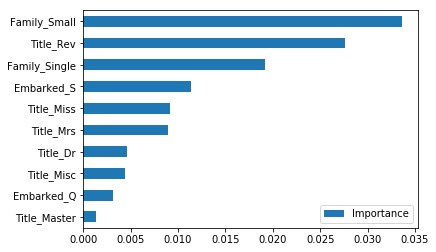

In [109]:
plot_variable_importance(train_X, train_y)

Если вы дальше хотите экспериментировать с добавлением или удалением моделей, то этот график как раз вам поможет.

А теперь как раз перейдем к построению разных моделей с перебором параметров по сетке и кросс-валидацией.

# Кросс-валидация, поиск параметров по сетке, случайный лес

In [125]:
from sklearn.model_selection import cross_validate

In [111]:
model = RandomForestClassifier(n_estimators=100)

Про кросс-валидацию можно подробнее прочитать в нашей первой лекции по ML.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

Мы передаем функции cross_validate модель, тренировные x и y, указываем на сколько частей будем разбивать тренировочную выборку, метрику ошибки, и возвращать ли ошибку на тренировочной выборке.

In [112]:
scores = cross_validate(model, train_X, train_y, cv=3, scoring=('accuracy'), return_train_score=True)

In [113]:
scores

{'fit_time': array([0.23935938, 0.2054491 , 0.34707046]),
 'score_time': array([0.01096964, 0.01296592, 0.01296592]),
 'test_score': array([0.73076923, 0.77884615, 0.76328502]),
 'train_score': array([0.91566265, 0.91566265, 0.92548077])}

Нас здесь интересует именно test_score - мы смотрим, что она не сильно скачет в зависимости от того, какую часть выборки мы отложили для теста.

In [114]:
np.mean(scores['test_score'])

0.7576334695899912

А вот так в среднем вела себя модель. Давайте попробуем написать функцию которая еще и будет делать подбор параметров по сетке внутри кросс-валидации.

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
parameters = {'n_estimators':[10, 50, 100, 200]}
model_cv = GridSearchCV(RandomForestClassifier(), parameters, 
                        cv=3, scoring=('accuracy'), return_train_score=True)

In [117]:
model_cv.fit(train_X, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [118]:
model_cv.cv_results_

{'mean_fit_time': array([0.0269293 , 0.10604914, 0.28557007, 0.36369483]),
 'std_fit_time': array([0.00293653, 0.01316522, 0.16577883, 0.05909422]),
 'mean_score_time': array([0.00132974, 0.00797892, 0.01196758, 0.01928147]),
 'std_score_time': array([0.00047013, 0.00293655, 0.00162898, 0.00329161]),
 'param_n_estimators': masked_array(data=[10, 50, 100, 200],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 200}],
 'split0_test_score': array([0.74038462, 0.73557692, 0.73076923, 0.73076923]),
 'split1_test_score': array([0.76923077, 0.77884615, 0.75480769, 0.75480769]),
 'split2_test_score': array([0.76811594, 0.77294686, 0.77294686, 0.76811594]),
 'mean_test_score': array([0.75922953, 0.76243981, 0.75280899, 0.75120385]),
 'std_test_score': array([0.01334917, 0.01916957, 0.01727005, 0.01545265]),
 'rank_test_score': array([2, 1, 3, 4

Здесь теперь анализируем иначе. 
Так `'split0_test_score': array([0.73076923, 0.75      , 0.74038462, 0.74038462])` это значения каждого из параметров n_estimators по первой разбивке.
Но не пугайтесь, лучшую модель выбрать несложно. По рангу понимаем, что лучше всего справился лес с 50 деревьями.

In [119]:
model_cv.cv_results_['rank_test_score']

array([2, 1, 3, 4])

Давайте посмотрим теперь внимательно на среднюю скорось по тестам. Тоже самое.

In [120]:
model_cv.cv_results_['mean_test_score']

array([0.75922953, 0.76243981, 0.75280899, 0.75120385])

Давайте теперь эту модель проверим на нашей отложенной тестовой выборке.

In [121]:
best_model = RandomForestClassifier(n_estimators=50)

In [122]:
best_model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(best_model.predict(test_X), test_y)

0.7425373134328358

Запомнили значение. Чуть позже выберем нашего победителя и отправим его на kaggle.
Напоминаю, что лучшее наше предсказание по baseline модели было 0.77 (все женщины и дети выжили).

# KNN
Давайте теперь попробуем KNN. Тоже с поиском параметров по сетке.

In [127]:
parameters = {'n_neighbors':[3, 5, 10, 15]}
model_cv = GridSearchCV(KNeighborsClassifier(), parameters, 
                        cv=3, scoring=('accuracy'), return_train_score=True)

In [128]:
model_cv.fit(train_X, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 10, 15]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [129]:
model_cv.cv_results_

{'mean_fit_time': array([0.149755  , 0.00166305, 0.00166368, 0.00166202]),
 'std_fit_time': array([0.20896492, 0.00047042, 0.00047086, 0.00047053]),
 'mean_score_time': array([0.0019954 , 0.00166098, 0.00166043, 0.00199429]),
 'std_score_time': array([1.41304342e-03, 4.70471382e-04, 4.70920787e-04, 7.86741172e-07]),
 'param_n_neighbors': masked_array(data=[3, 5, 10, 15],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15}],
 'split0_test_score': array([0.75961538, 0.75      , 0.69711538, 0.69711538]),
 'split1_test_score': array([0.77403846, 0.74519231, 0.70673077, 0.69711538]),
 'split2_test_score': array([0.71014493, 0.71497585, 0.6763285 , 0.68115942]),
 'mean_test_score': array([0.74799358, 0.73675762, 0.69341894, 0.6918138 ]),
 'std_test_score': array([0.02734124, 0.01549003, 0.01267965, 0.00751566]),
 'rank_test_score': array([1, 2, 3

Тут уже на кросс-валидации видим, что качество ниже RandomForest, но можем протестировать модель с 3 соседями на тестовой выборке.

In [130]:
best_model = KNeighborsClassifier(n_neighbors=3)
best_model.fit(train_X, train_y)
accuracy_score(best_model.predict(test_X), test_y)

0.7276119402985075

Модель справилась хуже. Идем эксперементировать дальше.

# Логистическая регрессия
Попробуем, наверняка, знакомую вам логистическую регрессию. Она как раз должна здорово работать с бинарным таргетом. Тут будем подбирать параметр регуляризации - алгоритм, который зануляет значения некоторых переменных для более эффективной работы модели.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [148]:
parameters = {'penalty':['l1', 'l2']}
model_cv = GridSearchCV(LogisticRegression(), parameters, 
                        cv=3, scoring=('accuracy'), return_train_score=True)

In [149]:
model_cv.fit(train_X, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [150]:
model_cv.cv_results_

{'mean_fit_time': array([0.0036695 , 0.00299247]),
 'std_fit_time': array([0.00047786, 0.0008142 ]),
 'mean_score_time': array([0.00066368, 0.00033251]),
 'std_score_time': array([0.00046929, 0.00047025]),
 'param_penalty': masked_array(data=['l1', 'l2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'penalty': 'l1'}, {'penalty': 'l2'}],
 'split0_test_score': array([0.78846154, 0.78846154]),
 'split1_test_score': array([0.85096154, 0.85576923]),
 'split2_test_score': array([0.80193237, 0.8115942 ]),
 'mean_test_score': array([0.81380417, 0.81861958]),
 'std_test_score': array([0.02687411, 0.02794326]),
 'rank_test_score': array([2, 1]),
 'split0_train_score': array([0.84096386, 0.84096386]),
 'split1_train_score': array([0.80722892, 0.80722892]),
 'split2_train_score': array([0.82932692, 0.82932692]),
 'mean_train_score': array([0.8258399, 0.8258399]),
 'std_train_score': array([0.01399121, 0.01399121])}

Наконец-то пробили 80%. Видим, что логистическая регрессия со штрафом l2 справилась лучше, давайте ее и проверим на отложенной выборке.

In [156]:
best_model = LogisticRegression(penalty = 'l2')
best_model.fit(train_X, train_y)
accuracy_score(best_model.predict(test_X), test_y)

0.8283582089552238

Результат даже лучше, чем на кросс-валидации. Но не теряем надежды, попробуем еще пару моделей.

# Найвный байес

Попробуйте воспроизвести такой же пайплайн данных для модели `MultinomialNB()` при разных параметрах `alpha`

In [151]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

# Градиентный бустинг
Последний классификатор, на который сегодня посмотрим - градиентный бустинг. Как и случайный лес - это ансанбль (делает предсказание на основании многих алгоритмов). Как случайный лес, использует решающие деревья. Главное отличие в том, что случайный лес строит много-много деревеьев, а потом выбирает предсказание из них за счет голосования или усредняя непрерывное предсказание. Градиентный бустинг строит по одному дереву, для каждого из них считает ошибку и каждым последующим деревом пытается минимизировать ошибку предыдущего. Давайте посмотрим, как он справится здесь.

https://www.datasciencecentral.com/profiles/blogs/decision-tree-vs-random-forest-vs-boosted-trees-explained

In [6]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

# Другие модели

Попробуйте найти в библиотеке sklean другие методы машинного обучения и оценить качество на них. Какая модель лучше?

In [7]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

# Kaggle Submission

Давайте для них обеих сгенерируем финальное предсказание, которое отправим на kaggle.

In [180]:
model = MultinomialNB(alpha = 1)
test_X = full_X[891:]
model.fit(train_valid_X, train_valid_y)
pred = model.predict(test_X)
test = pd.DataFrame({'PassengerId': full[891:].PassengerId , 'Survived': pred})
test['Survived'] = test['Survived'].apply(lambda x: int(x))
print(test.shape)
test.head()


(418, 2)


,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1


In [181]:
test.to_csv('titanic_pred_nb.csv' , index = False )

In [182]:
model = LogisticRegression(penalty = 'l2')
test_X = full_X[891:]
model.fit(train_valid_X, train_valid_y)
pred = model.predict(test_X)
test = pd.DataFrame({'PassengerId': full[891:].PassengerId , 'Survived': pred})
test['Survived'] = test['Survived'].apply(lambda x: int(x))
print(test.shape)
test.head()


(418, 2)


,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1


In [183]:
test.to_csv('titanic_pred_lr.csv' , index = False )